**Outline:**
   + python generator
   + machine learning based method:titanic example
   + heusric search method

## 0. python generator
 - generator用来创建一个迭代器；使用 yield表达式来定义一个generator，使用next函数每次遍历一个对象；
 - yield vs return：yield暂停当前函数的执行并保状态， return中止函数的执行过程；
 - for loop中使用yield时能够在raise StopIteration时自动结束；
 - Ref:
     - [https://docs.python.org/3/glossary.html#term-generator](https://docs.python.org/3/glossary.html#term-generator)
     - [https://www.programiz.com/python-programming/generator](https://www.programiz.com/python-programming/generator)

In [1]:
import time

def func(i):
    time.sleep(0.5)
    return i

In [2]:
def loop(n):
    results = []
    for i in range(n):
        r = func(i)
        results.append(r)
    return results

In [3]:
loop(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
def gen_func():
    yield 1
    yield 2
    yield 3

In [5]:
g = gen_func()

In [6]:
g

<generator object gen_func at 0x108fc5d00>

In [7]:
next(g)

1

In [8]:
next(g)

2

In [9]:
next(g)

3

In [10]:
next(g)

StopIteration: 

In [12]:
for i in gen_func():
    print(i)

1
2
3


In [13]:
for i in loop(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [14]:
def loop_with_gene(n):
    results = []
    for i in range(n):
        r = func(i)
        yield r

In [15]:
for i in loop_with_gene(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


---
## 1. Kaggle Titanic
### 1.1 查看数据

In [3]:
import pandas as pd

In [4]:
titanic_fname = 'datasource/titanic/train.csv'

In [5]:
content = pd.read_csv(titanic_fname)

In [6]:
content.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
content['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
# 去掉空值
content = content.dropna()

In [29]:
# 查看年龄和票价的关系
fares = content['Fare'].tolist()
ages = content['Age'].tolist()

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

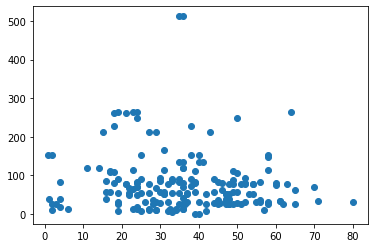

In [28]:
plt.scatter(ages, fares)

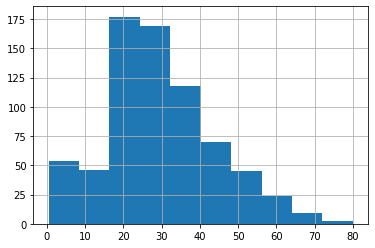

In [18]:
# 通过直方图可以看到年龄和购买数量的密度分布
content['Age'].hist()

In [34]:
ages_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)
]

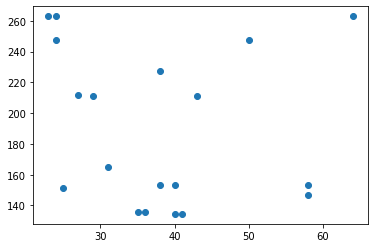

In [36]:
sub_fare = ages_with_fares['Fare'].tolist()
sub_age = ages_with_fares['Age'].tolist()
plt.scatter(sub_age, sub_fare)

In [19]:
import numpy as np

In [168]:
# 每个年龄段的平均票价和年龄的关系（更具有统计学意义）
result = content['Fare'].groupby(pd.cut(content['Age'], np.arange(0, 81, 10))).mean()
result

Age
(0, 10]      55.459580
(10, 20]    108.503289
(20, 30]     82.212085
(30, 40]     86.389200
(40, 50]     64.970712
(50, 60]     66.346968
(60, 70]     74.107287
(70, 80]     32.327100
Name: Fare, dtype: float64

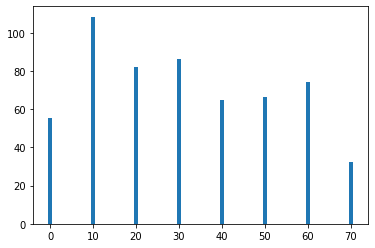

In [169]:
plt.bar(np.arange(0, 80, 10), result.values)
plt.show()

### 1.2 问题：寻找一条直线来拟合年龄和票价的关系？

- Method 1 : **Random Choice**
    + 随机选择参数 code: [Lesson03_titanic_random_choice.py](Lesson03_titanic_random_choice.py)

<img style="display:inline" src="imagesource/RandomChoiceFit.png" width=400 height=256/>
<img style="display:inline" src="imagesource/RandomChoiceConverge.png" width=400 height=256/>



- Method 2 : **Supervised Direction**
    + 根据每次迭代的误差值选择参数的变化方向 code: [Lesson03_titanic_supervised_direction.py](Lesson03_titanic_supervised_direction.py)

<img style="display:inline" src="imagesource/SupervisedDirectionFit.png" width=400 height=256/>
<img style="display:inline" src="imagesource/SupervisedDirectionConverge.png" width=400 height=256/>


- Method 3 : **Gradient Descent**
    - 梯度下降法 code: [Lesson03_titanic_gradient_descent.py](Lesson03_titanic_gradient_descent.py)

<img style="display:inline" src="imagesource/GradientDescentFit.png" width=400 height=256/>
<img style="display:inline" src="imagesource/GradientDescentConverge.png" width=400 height=256/>



+ **总结**:
    + 参数较多时使用梯度下降收敛速度更快，随机选择时参数选择空间较大；

---
## 2. Best First Search
- [Best first search Wiki](https://en.wikipedia.org/wiki/Best-first_search)
- 任务目标: 根据中国的城市，做一个简易版的导航地图
- 处理过程：
    - 使用正则表达式解析中国城市和坐标的数据；
    - 给定评价函数：根据两个城市的经纬度坐标得到平面上的距离[Haversine_formula](https://en.wikipedia.org/wiki/Haversine_formula)；
    - BFS；

### 2.1  解析数据，计算城市距离

In [4]:
# 城市和坐标，取自开源数据
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [5]:
import re

In [6]:
city_location = {}
# {
# city_name: ()
# }

In [7]:
# 解析城市和坐标构成字典
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
        
    city = re.findall("name:'(\w+)'", line)[0]
    x_y = re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city, x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [8]:
import math

In [9]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.
    
    Parameters
    ----------
    origin: tuple of float (lat, long)
    destination: tuple of flaot (lat, long)
    
    Returns
    -------
    distance_in_km : float
    
    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083) # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2)) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [10]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [179]:
get_city_distance('杭州', '上海')

153.5185697155768

In [180]:
get_city_distance('郑州', '上海')

889.1531027280486

In [182]:
get_city_distance('上海', '广州')

1003.6641619801394

In [11]:
get_city_distance('郑州', '广州')

514.4588268986892

### 2.2 绘制地图

In [12]:
import networkx as nx

In [13]:
city_graph = {}

In [14]:
cities = list(city_location.keys())

In [15]:
cities

['兰州',
 '嘉峪关',
 '西宁',
 '成都',
 '石家庄',
 '拉萨',
 '贵阳',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '沈阳',
 '长春',
 '哈尔滨',
 '太原',
 '西安',
 '北京',
 '上海',
 '重庆',
 '天津',
 '呼和浩特',
 '南宁',
 '银川',
 '乌鲁木齐',
 '香港',
 '澳门']

In [145]:
city_graph = nx.Graph()

In [146]:
city_graph.add_nodes_from(cities)

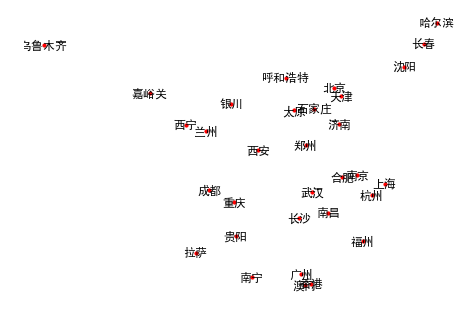

In [147]:
nx.draw(city_graph, city_location,  with_labels=True, node_size=10)

In [149]:
get_city_distance('西安', '兰州')

582.9782141643079

### 2.3 构建城市之间的连接关系

In [16]:
threshold = 700

In [17]:
from collections import defaultdict

In [18]:
len(cities)

32

In [19]:
cities_connection = defaultdict(list)

for c1 in cities:
    for c2 in cities:
        if c1 == c2: continue
        
        if get_city_distance(c1, c2) < threshold:
            cities_connection[c1].append(c2)

In [20]:
cities_connection['兰州']

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [21]:
get_city_distance('沈阳', '北京')

776.4154006857316

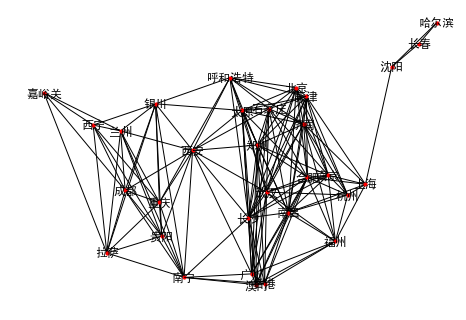

In [300]:
# 需要解决中文不显示的问题
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [302]:
len(cities_connection)

31

In [303]:
len(city_location)

32

### 2.4  启发式搜索

In [37]:
def is_goal(destination):
    # 装饰器
    def _wrap(current_path):
        return current_path[-1] == destination
    return _wrap

In [22]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        
        successors = graph[frontier]
        
        for city in successors:
            if city in path: continue
            
            new_path = path + [city]
            pathes.append(new_path)
            
            if is_goal(new_path):
                return new_path
        seen.add(frontier)
        # 使用定制的搜索策略对路径排序  
        pathes = search_strategy(pathes)


+ Note: [beam search:防止搜索空间过大](https://en.wikipedia.org/wiki/Beam_search)

In [92]:
# 搜索路径排序
def sort_path(cmp_func):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)
    return _sorted

In [39]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=lambda n:n)

['北京', '长沙', '南宁', '拉萨']

In [53]:
search(cities_connection, start='沈阳', is_goal=is_goal('西安'), search_strategy=lambda n:n)

['沈阳', '上海', '济南', '石家庄', '西安']

**【1】路径最短策略**

In [59]:
def get_path_distance(path):
    distance = 0
    
    for i, c in enumerate(path[:-1]):
        distance += get_city_distance(c, path[i+1])
    return distance

In [62]:
search(cities_connection, start='沈阳', is_goal=is_goal('西安'), search_strategy=sort_path(get_path_distance))

['沈阳', '上海', '合肥', '武汉', '西安']

In [67]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), 
       search_strategy=sort_path(get_path_distance))

['北京', '呼和浩特', '银川', '拉萨']

In [73]:
search(cities_connection, start='上海', is_goal=is_goal('西宁'),
      search_strategy=sort_path(get_path_distance))

['上海', '南京', '郑州', '西安', '重庆', '西宁']

**【2】最小换乘站策略**

In [43]:
def get_total_station(path):
    return len(path)

In [63]:
search(cities_connection, start='沈阳', is_goal=is_goal('西安'),
       search_strategy=sort_path(get_total_station))

['沈阳', '上海', '济南', '石家庄', '西安']

In [64]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'),
      search_strategy=sort_path(get_total_station))

['北京', '长沙', '南宁', '拉萨']

In [74]:
search(cities_connection, start='上海', is_goal=is_goal('西宁'),
      search_strategy=sort_path(get_total_station))

['上海', '济南', '太原', '银川', '西宁']

**【3】最多换乘站策略**

In [75]:
def get_as_much_path(path):
    return -1 * len(path)

In [76]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(get_as_much_path))

['北京',
 '石家庄',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '太原',
 '西安',
 '兰州',
 '拉萨']

**【4】多个策略组合使用，赋予不同的权重**

In [77]:
def get_comprehensive_path(path):
    return get_path_distance(path) + 30 * get_total_station(path)

In [78]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), 
       search_strategy=sort_path(get_comprehensive_path))

['北京', '呼和浩特', '银川', '拉萨']

In [90]:
search(cities_connection, start='哈尔滨', is_goal=is_goal('银川'), 
       search_strategy=sort_path(get_comprehensive_path))

['哈尔滨', '沈阳', '上海', '合肥', '太原', '银川']